<a href="https://colab.research.google.com/github/Huynh-Thoi/Pytorch-dogCat/blob/main/Train_model_dogcat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats


 99% 808M/812M [00:21<00:00, 42.6MB/s]
100% 812M/812M [00:22<00:00, 38.6MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.12489.jpg', 'dog.8152.jpg', 'dog.6365.jpg', 'cat.8138.jpg', 'dog.11515.jpg', 'cat.5012.jpg', 'dog.1928.jpg', 'cat.658.jpg', 'dog.4717.jpg', 'dog.2262.jpg', 'cat.10808.jpg', 'cat.8501.jpg', 'dog.6600.jpg', 'cat.7002.jpg', 'dog.2857.jpg', 'cat.6149.jpg', 'cat.2295.jpg', 'dog.11952.jpg', 'cat.4939.jpg', 'dog.10251.jpg', 'dog.6339.jpg', 'cat.8906.jpg', 'dog.6564.jpg', 'dog.10269.jpg', 'dog.10406.jpg', 'dog.3673.jpg', 'dog.11359.jpg', 'cat.8742.jpg', 'dog.961.jpg', 'cat.8261.jpg', 'cat.1527.jpg', 'cat.7891.jpg', 'cat.1810.jpg', 'dog.5453.jpg', 'dog.3323.jpg', 'dog.3668.jpg', 'dog.8160.jpg', 'cat.9528.jpg', 'cat.450.jpg', 'cat.3507.jpg', 'cat.10359.jpg', 'dog.9806.jpg', 'dog.4066.jpg', 'cat.11454.jpg', 'dog.7733.jpg', 'cat.8786.jpg', 'dog.1935.jpg', 'dog.363.jpg', 'cat.5499.jpg', 'cat.6587.jpg', 'cat.9179.jpg', 'dog.2189.jpg', 'dog.932.jpg', 'cat.5492.jpg', 'cat.10930.jpg', 'cat.1058.jpg', 'cat.1191.jpg', 'dog.1286.jpg', 'cat.12134.jpg', 'dog.9431.jpg', 'dog.1082.jpg', 'cat.5393.jpg', 

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

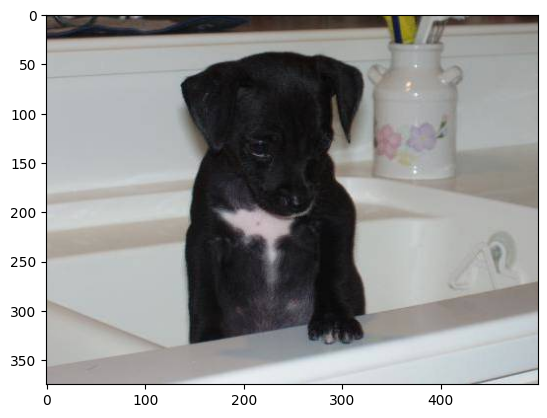

In [ ]:

# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

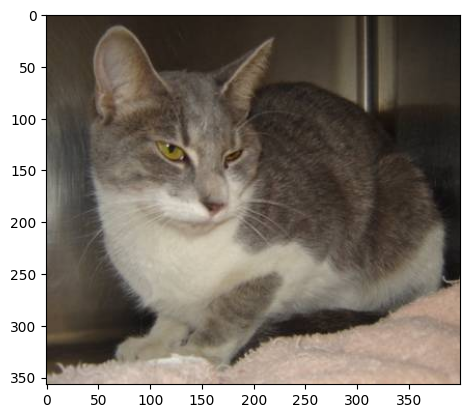

In [ ]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])

cat
dog
dog
cat
dog


In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

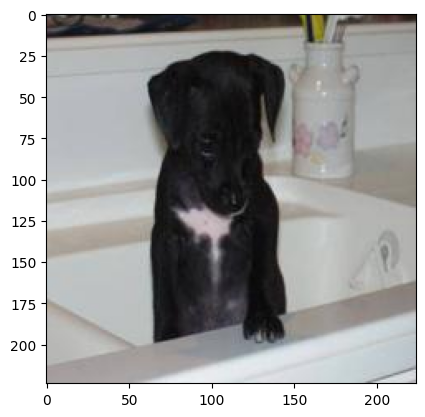

In [ ]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

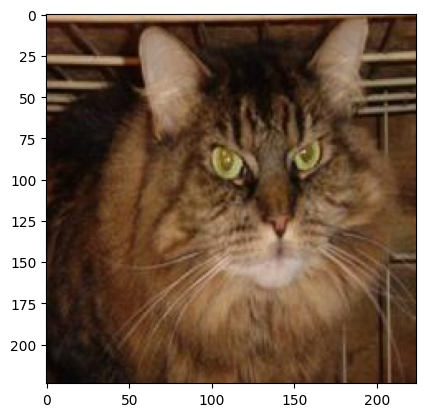

In [ ]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.4302.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['cat.12489.jpg', 'dog.8152.jpg', 'dog.6365.jpg', 'cat.8138.jpg', 'dog.11515.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[0, 1, 1, 0, 1]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 990 1010]


In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[  9  14  47]
   [  5  10  43]
   [  0   7  40]
   ...
   [ 42  65  81]
   [ 35  57  75]
   [ 24  48  66]]

  [[  5  10  43]
   [  6  11  44]
   [  4  11  44]
   ...
   [ 45  65  82]
   [ 35  57  75]
   [ 24  48  66]]

  [[  0   8  38]
   [  4  12  42]
   [  7  15  45]
   ...
   [ 45  65  82]
   [ 34  56  74]
   [ 26  48  66]]

  ...

  [[ 13  16  60]
   [  7  13  56]
   [  4  11  54]
   ...
   [  0  13  39]
   [  0  12  38]
   [  0  11  37]]

  [[ 13  13  59]
   [  9  12  57]
   [  7  13  56]
   ...
   [  1  13  41]
   [  0  12  40]
   [  0  11  39]]

  [[ 11  11  57]
   [ 10  13  58]
   [ 11  14  58]
   ...
   [  2  14  42]
   [  0  12  40]
   [  0  11  39]]]


 [[[ 53  76  48]
   [ 56  79  51]
   [ 63  86  58]
   ...
   [ 58 106  70]
   [ 63 111  75]
   [ 69 117  81]]

  [[ 51  74  46]
   [ 53  76  48]
   [ 58  81  53]
   ...
   [ 62 110  74]
   [ 67 115  79]
   [ 74 122  86]]

  [[ 50  72  47]
   [ 50  72  47]
   [ 50  75  49]
   ...
   [ 67 115  79]
   [ 74 122  86]
   [ 81 129

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.88627451 0.86666667 0.8627451 ]
   [0.75294118 0.73333333 0.72941176]
   [0.58823529 0.56862745 0.56470588]
   ...
   [0.86666667 0.85098039 0.8745098 ]
   [0.65098039 0.63529412 0.65882353]
   [0.48627451 0.47058824 0.49411765]]

  [[0.88627451 0.86666667 0.8627451 ]
   [0.75686275 0.7372549  0.73333333]
   [0.6        0.58039216 0.57647059]
   ...
   [0.87843137 0.8627451  0.88627451]
   [0.6627451  0.64705882 0.67058824]
   [0.49803922 0.48235294 0.50588235]]

  [[0.88235294 0.8627451  0.85882353]
   [0.77254902 0.75294118 0.74901961]
   [0.61960784 0.6        0.59607843]
   ...
   [0.89019608 0.8745098  0.89411765]
   [0.67843137 0.6627451  0.68235294]
   [0.50980392 0.49411765 0.51372549]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.98431373 0.99215686 0.99215686]
   [0.98431373 0.99215686 0.99215686]
   [0.98431373 0.99215686 0.99215686]]

  [[1.         1.         1.        ]
   [1. 

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

num_of_classes = 2

# Define the input layer
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))

# Wrap the pretrained model call in a Lambda layer
# This ensures the input is treated as a concrete tensor during execution
x = tf.keras.layers.Lambda(lambda inputs: pretrained_model(inputs))(input_layer)

# Add the final Dense layer for classification
output_layer = tf.keras.layers.Dense(num_of_classes)(x)

# Create the model using the Functional API
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │           2,562 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,562 (10.01 KB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - acc: 0.8033 - loss: 0.3669
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.9815 - loss: 0.0639
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - acc: 0.9840 - loss: 0.0552
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - acc: 0.9932 - loss: 0.0316
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - acc: 0.9902 - loss: 0.0339


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 259ms/step - acc: 0.9810 - loss: 0.0356
Test Loss = 0.03801795840263367
Test Accuracy = 0.9800000190734863


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /dog.jpg
